### Students Performance in Exams

This data set consists of the marks secured by the students in various subjects.

#### Datasets Description
1. gender: female , male
2. race.ethnicity : group A, group B, group C, group D, group E
3. parental.level.of.education (Parent education levels of students) : associate's degree, bachelor's degree, high school, master's degree, some college, some high school
4. lunch: free/reduced, standard
5. test.preparation.course: completed, none, math.score, reading.score, writing.score
6. Which features are categorical? : gender, race.ethnicity, parental.level.of.education, lunch, test.preparation.course
7. Which features are numerical? : math.score, reading.score, writing.score

In [12]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Importing dataset as pandas dataframe

df = pd.read_csv('data/StudentsPerformance.csv')

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
df.shape

(1000, 8)

Data cleaning

In [20]:
# check missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [21]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [22]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
# checking unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [24]:
# statistics summary
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
# detailed categorical features analysis

print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [30]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [32]:
# adding new column named 'Total Score' and 'Average' 

df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
# Who obtained full marks

reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [35]:
# Who obtained marks less than or equal to 20

reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Data Visualization

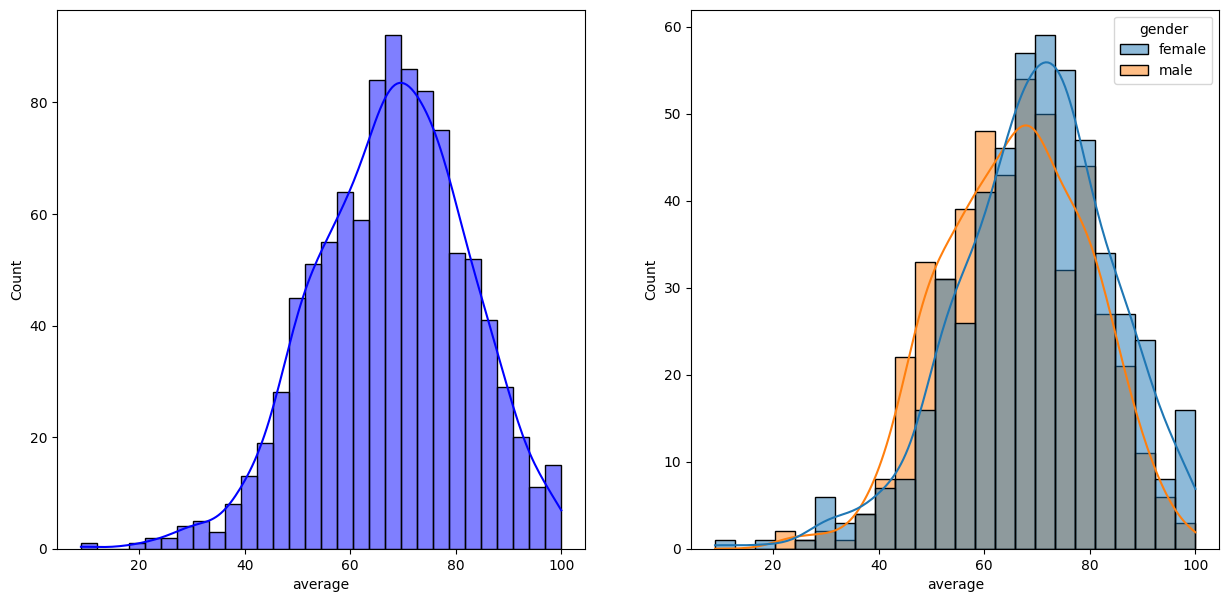

In [37]:
# Average marks based on gender visualization

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

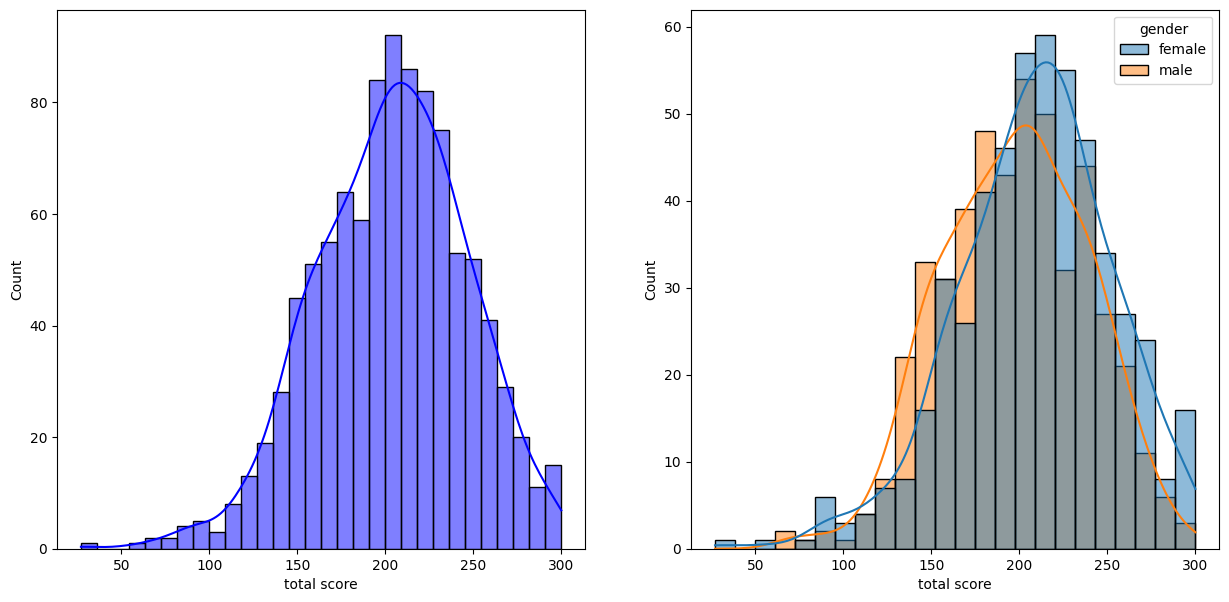

In [39]:
#Total Score based on gender visualization

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

- Insights : Female students tend to perform well then male students.

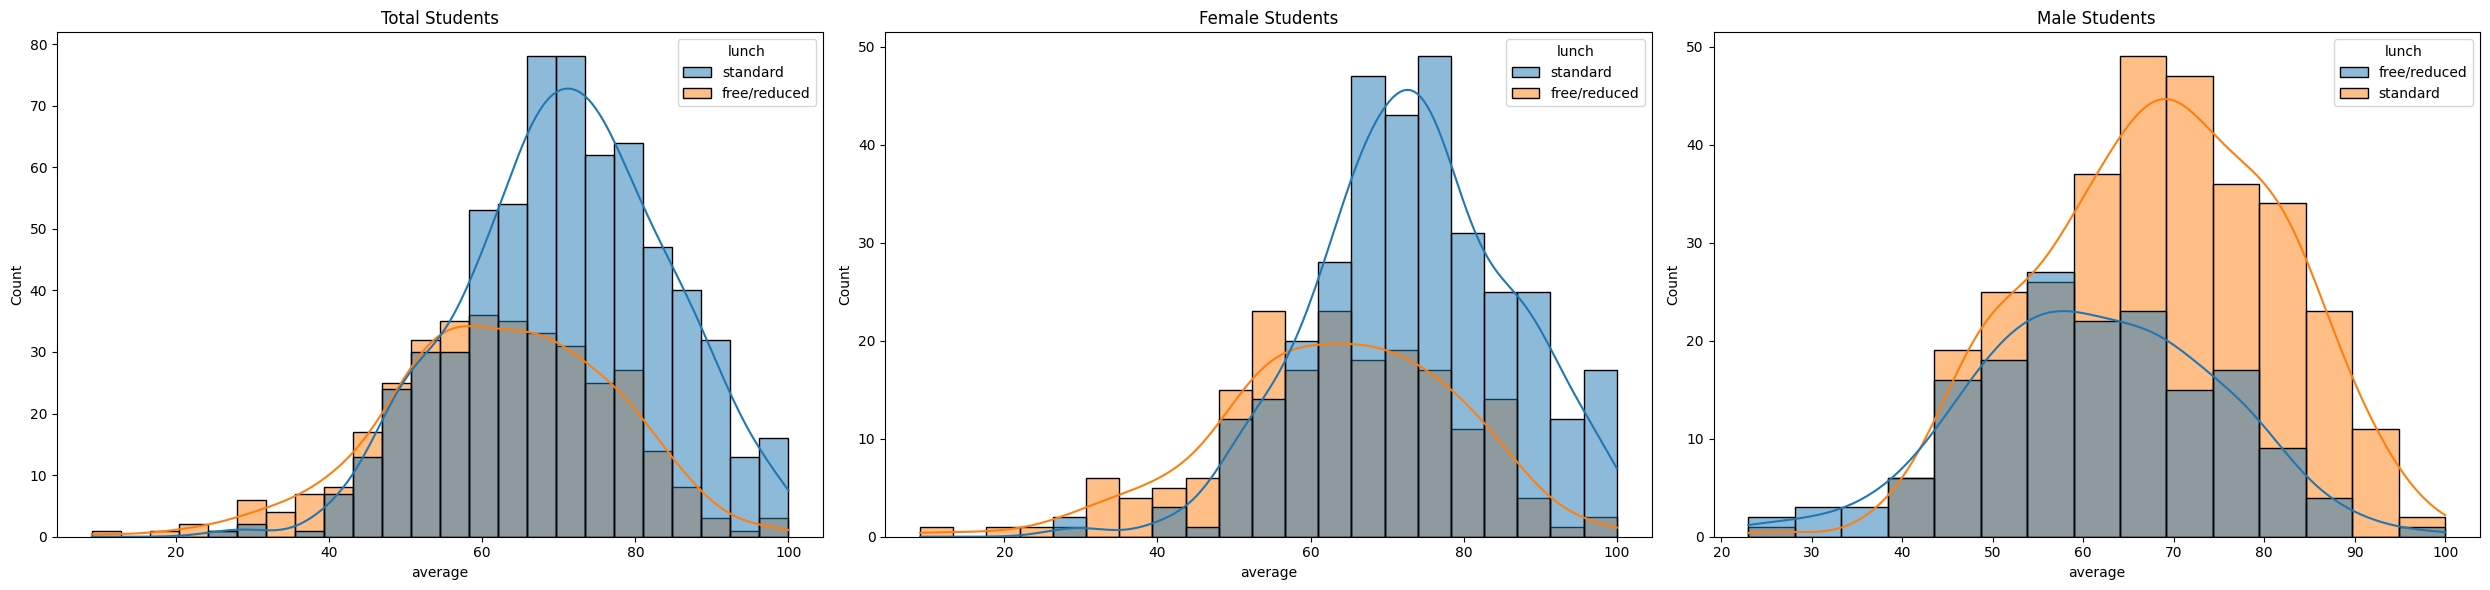

In [ ]:
# Visualization based on lunch

fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axes[0])
axes[0].set_title('Total Students')

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch', ax=axes[1])
axes[1].set_title('Female Students')

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch', ax=axes[2])
axes[2].set_title('Male Students')

plt.tight_layout() #prevent labels from overlapping
plt.show()


Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

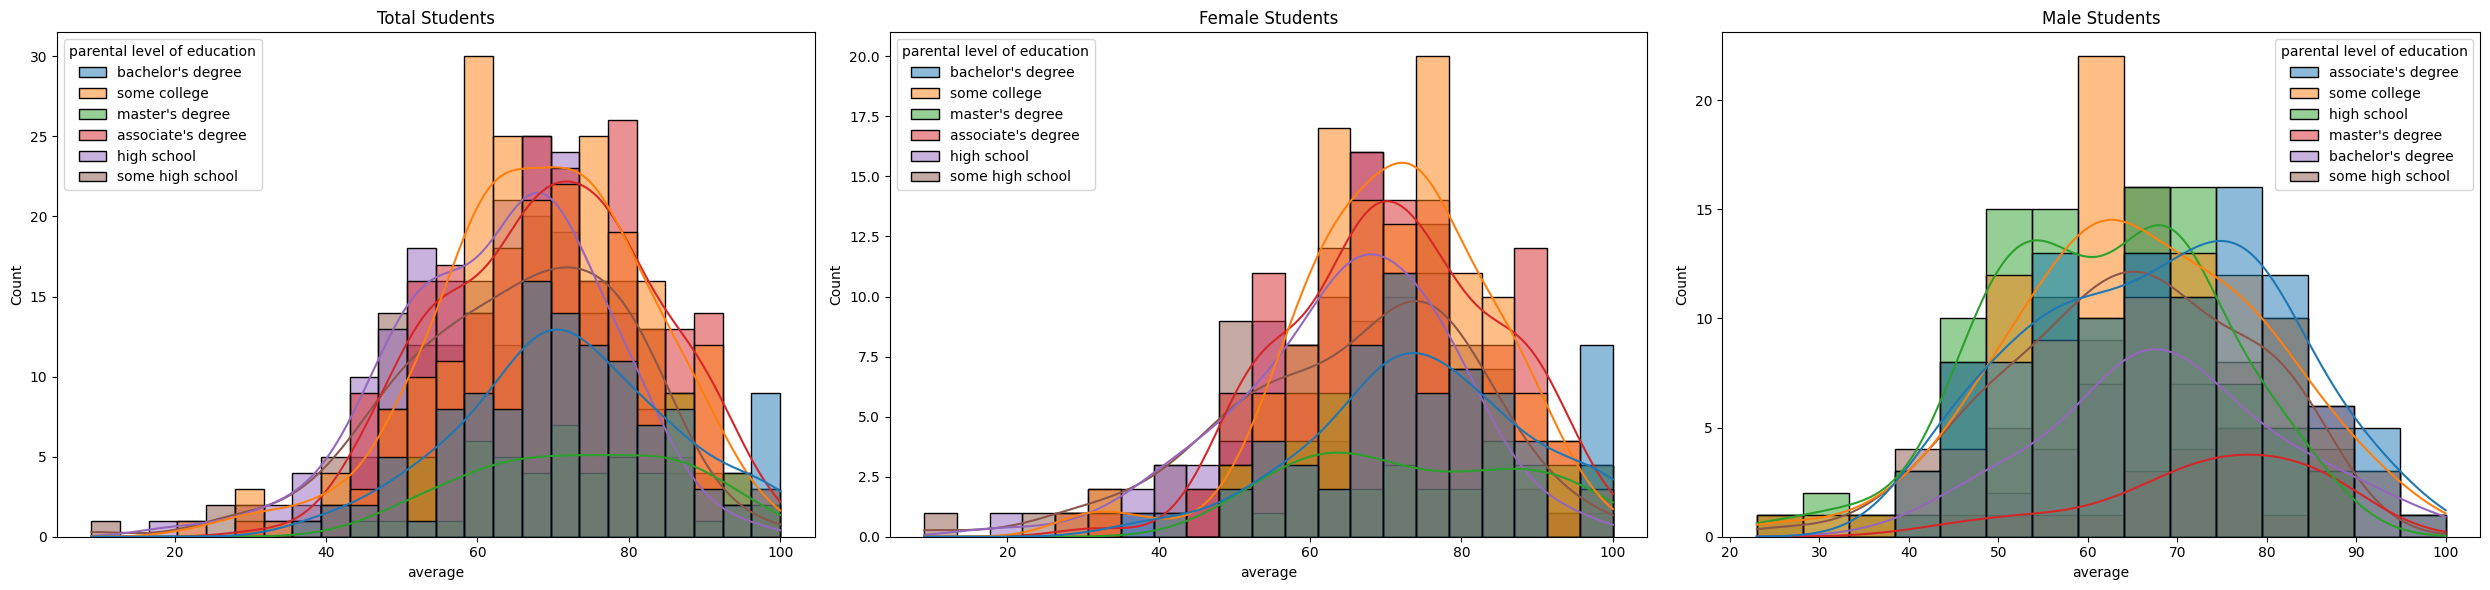

In [43]:
# Visualization based on parental level of education

fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average', kde=True, hue='parental level of education', ax=axes[0])
axes[0].set_title('Total Students')

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education', ax=axes[1])
axes[1].set_title('Female Students')

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education', ax=axes[2])
axes[2].set_title('Male Students')

plt.tight_layout() #prevent labels from overlapping
plt.show()


Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

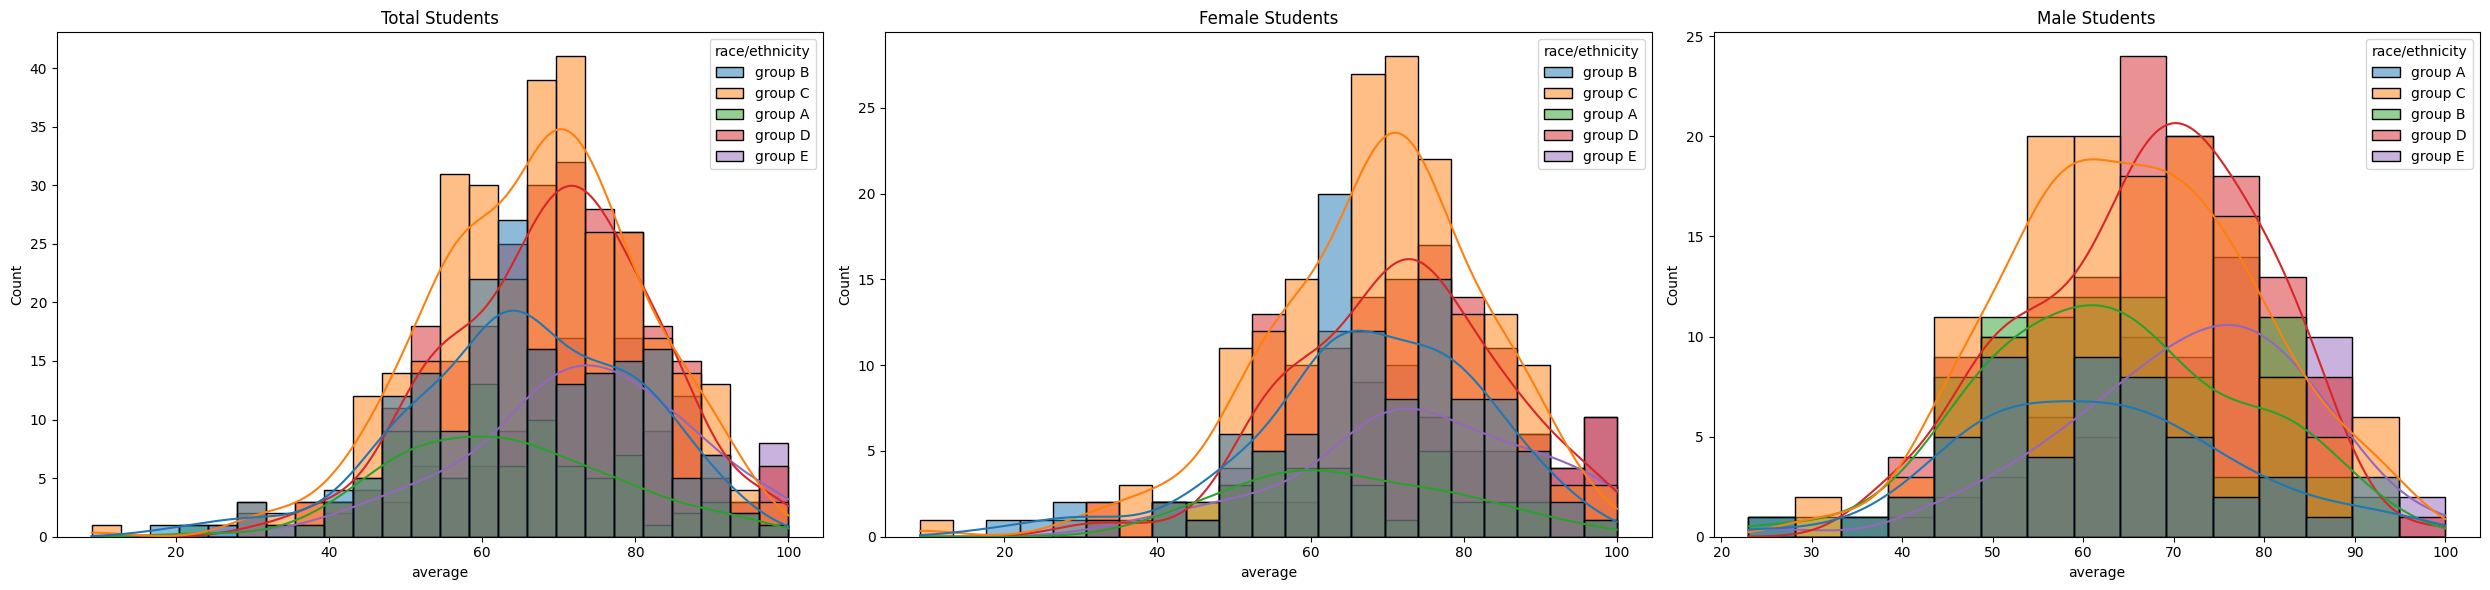

In [44]:
# Visualization based on race/ethnicity

fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', ax=axes[0])
axes[0].set_title('Total Students')

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity', ax=axes[1])
axes[1].set_title('Female Students')

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity', ax=axes[2])
axes[2].set_title('Male Students')

plt.tight_layout() #prevent labels from overlapping
plt.show()


Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

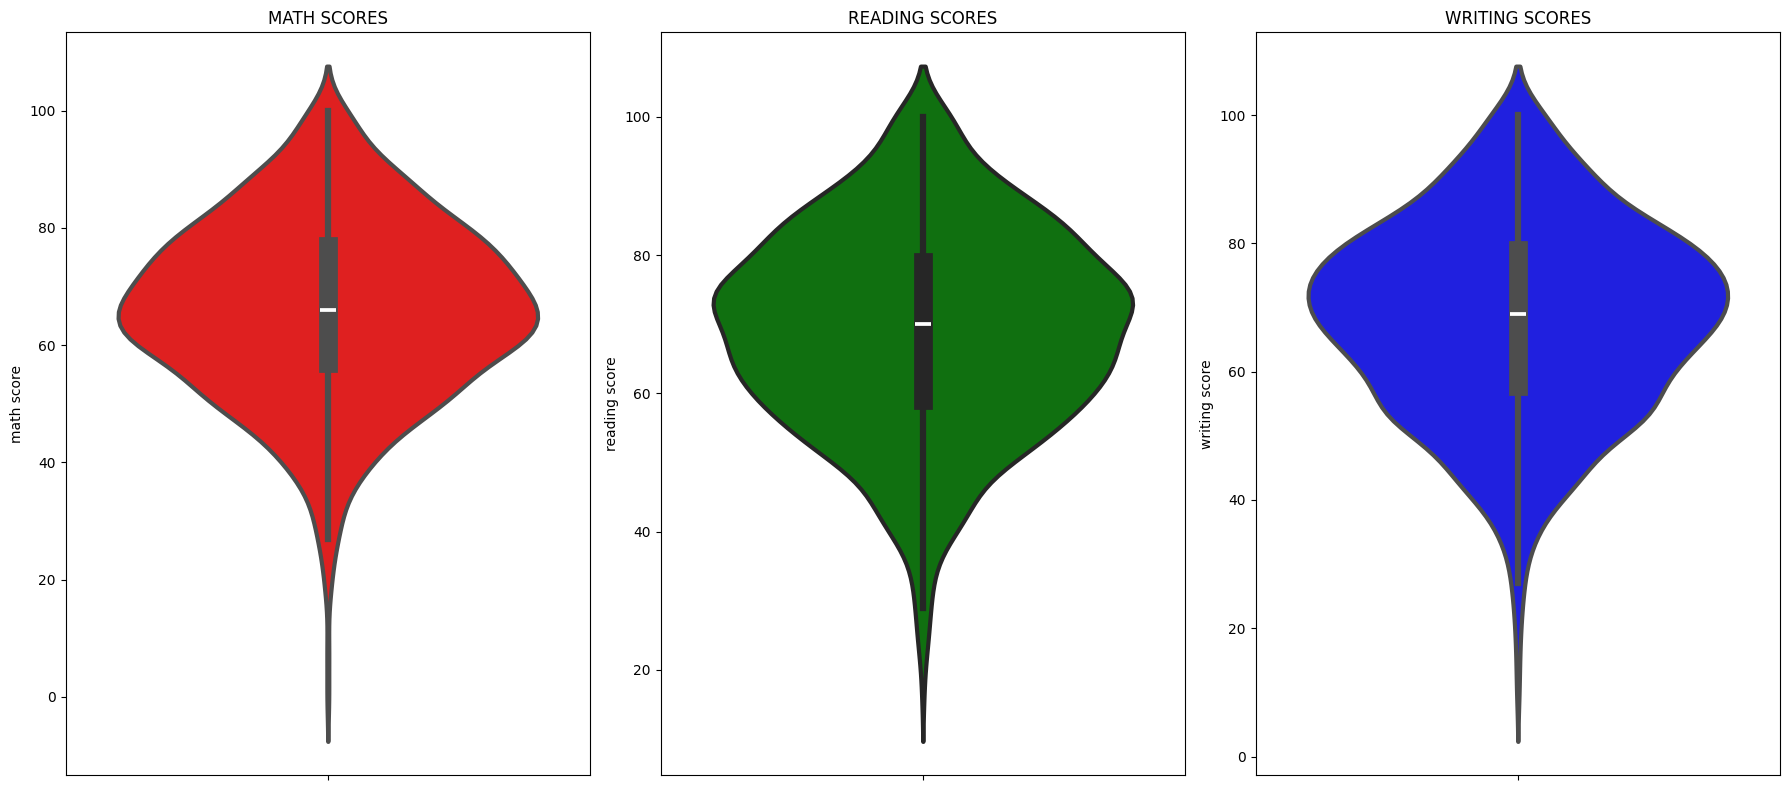

In [46]:
# Maximum score of students in all three subjects

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

axes[0].set_title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3, ax=axes[0])

axes[1].set_title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3, ax=axes[1])

axes[2].set_title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3, ax=axes[2])

plt.tight_layout()
plt.show()


Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### Multivariate analysis

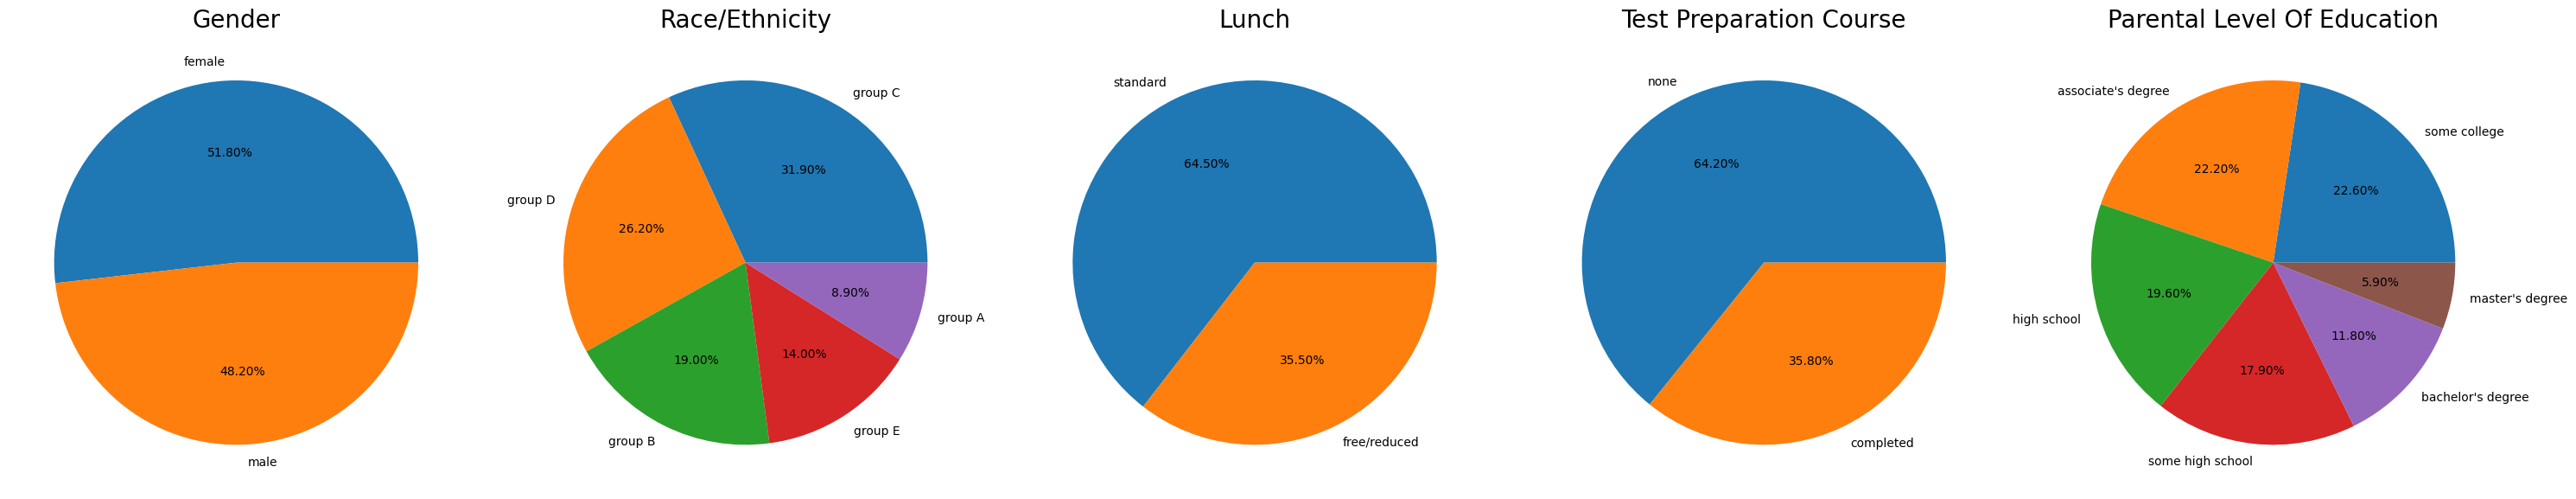

In [47]:
# Multivariate analysis using pie plot

# Set the overall figure size
plt.rcParams['figure.figsize'] = (30, 12)

# List of columns you want to plot
categorical_columns = [
    'gender',
    'race/ethnicity',
    'lunch',
    'test preparation course',
    'parental level of education'
]

# Create a figure and a 1x5 grid of subplots
fig, axes = plt.subplots(1, 5)

# Loop through the columns and the axes to create each pie chart
for i, col in enumerate(categorical_columns):
    # Get the value counts and labels
    size = df[col].value_counts()
    labels = size.index
    
    # Select the current subplot
    ax = axes[i]
    
    # Create the pie chart on the current subplot
    ax.pie(size, labels=labels, autopct='%.2f%%')
    ax.set_title(col.replace('_', ' ').title(), fontsize=20) # Automatically create a nice title
    ax.axis('off')

plt.tight_layout()
plt.show()

Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

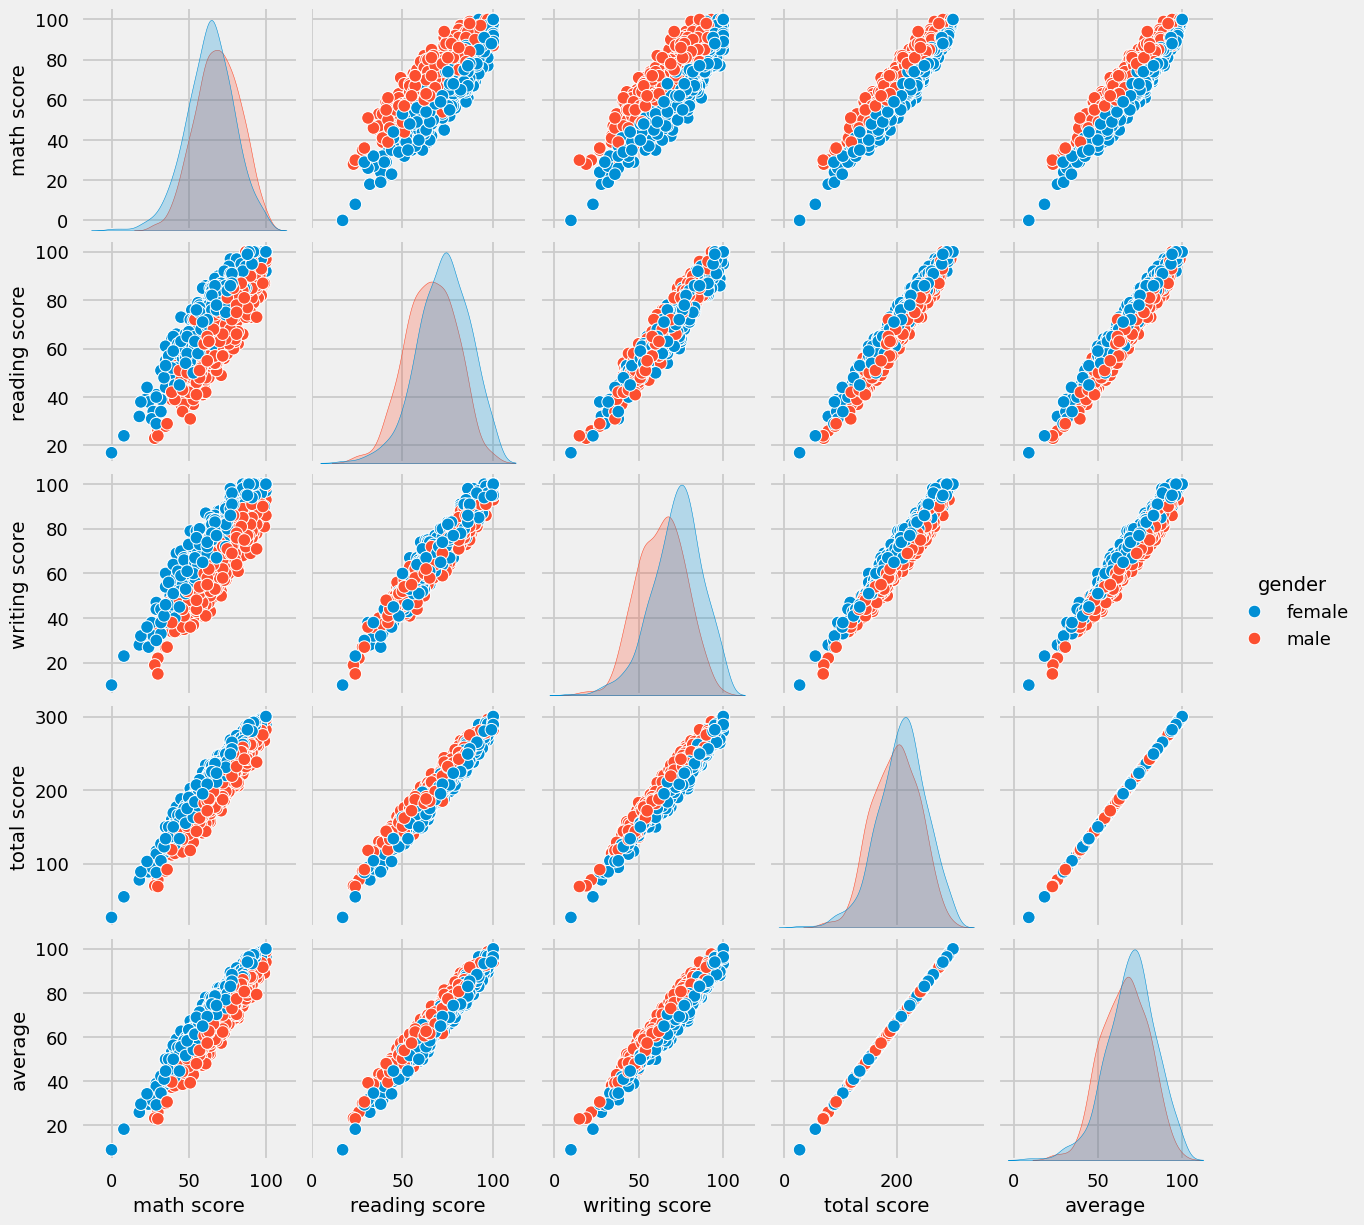

In [ ]:
# pair plot based on gender

sns.pairplot(df,hue = 'gender')
plt.show()

Insights
- From the above plot it is clear that all the scores increase linearly with each other.

#### Univariate analysis

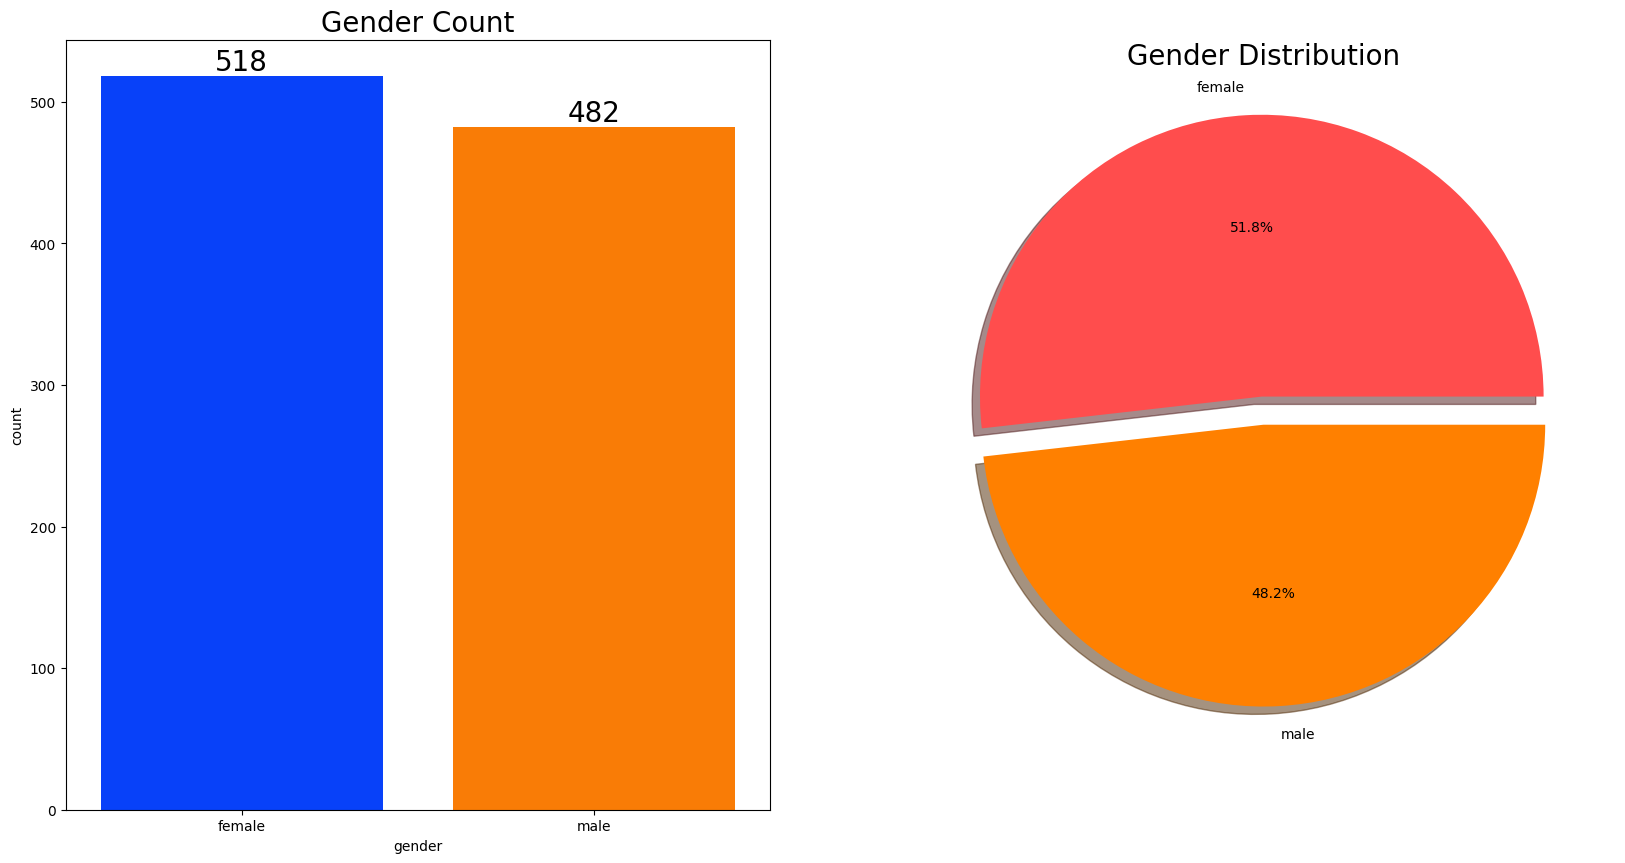

In [48]:
# Based on gender

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Gender Count', fontsize=20) # Add a title to the first plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

gender_counts = df['gender'].value_counts()
labels = gender_counts.index # Get labels directly from data to prevent mismatches
explode = [0.1, 0] # Assuming the first item from value_counts() should be exploded

ax[1].pie(x=gender_counts, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
ax[1].set_title('Gender Distribution', fontsize=20) # Add a title to the second plot

plt.show()


Insights 
- Gender has balanced data with female students are 51.8 (48%) and male students are 48.2 (52%) 

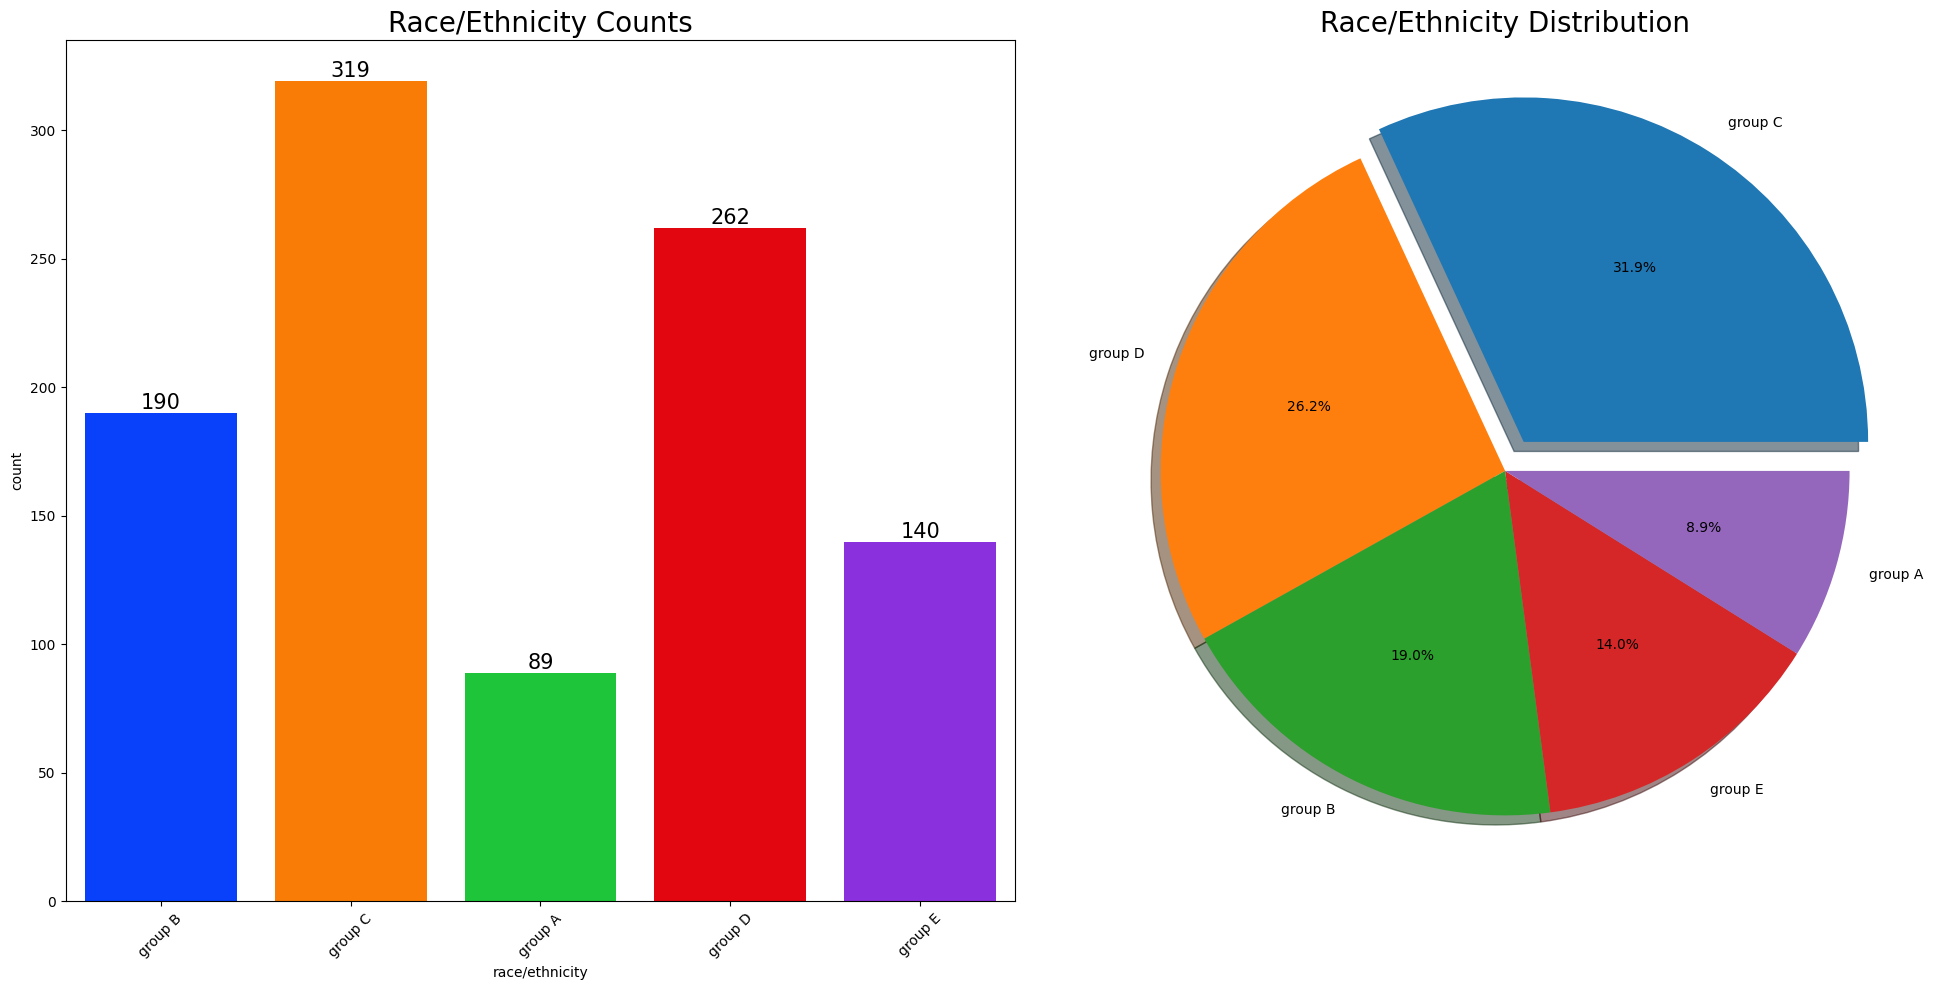

In [60]:
# Based on race/ethnicity

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='race/ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Race/Ethnicity Counts', fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)
# Rotate labels for better readability
ax[0].tick_params(axis='x', labelrotation=45)

race_counts = df['race/ethnicity'].value_counts()
labels = race_counts.index
explode = [0.1, 0, 0, 0, 0]

ax[1].pie(x=race_counts, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)
ax[1].set_title('Race/Ethnicity Distribution', fontsize=20)

plt.tight_layout()
plt.show()


Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

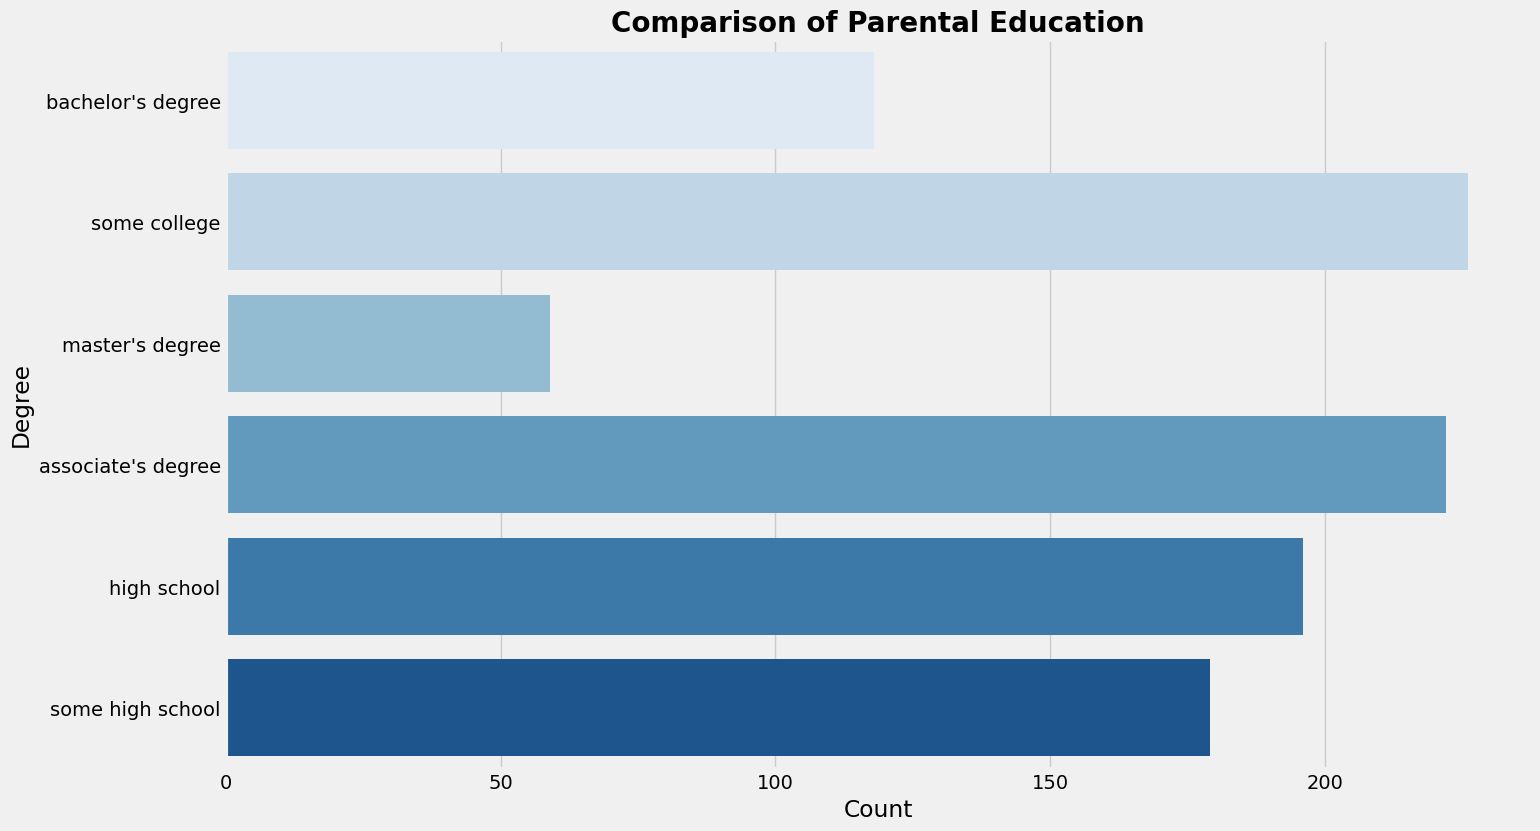

In [61]:
# Based on parental level of education

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(y=df['parental level of education'], palette='Blues')

plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Count') # The x-axis is now the count
plt.ylabel('Degree') # The y-axis is now the degree
plt.show()


Insights 
- Largest number of parents are from some college.

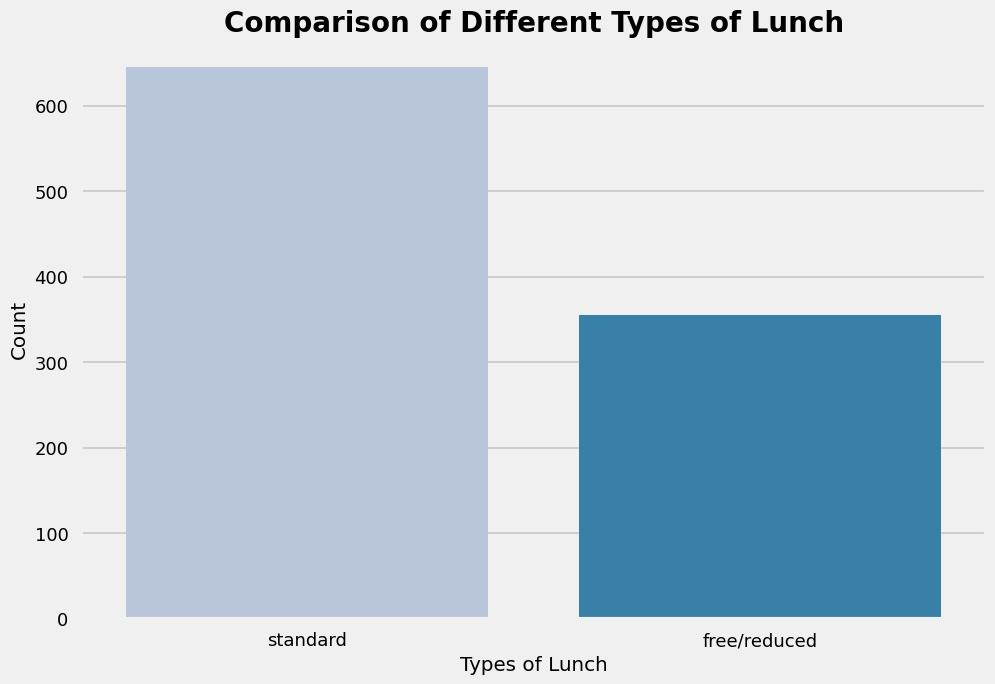

In [62]:
# Based on lunch

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')

sns.countplot(x=df['lunch'], palette='PuBu')

plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

plt.show()


Insights 
- Students being served Standard lunch was more than free lunch

#### Bivariate analysis

In [58]:
numerical_cols = ['math score', 'reading score', 'writing score']
gender_group = df.groupby('gender')[numerical_cols].mean()

print(gender_group)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


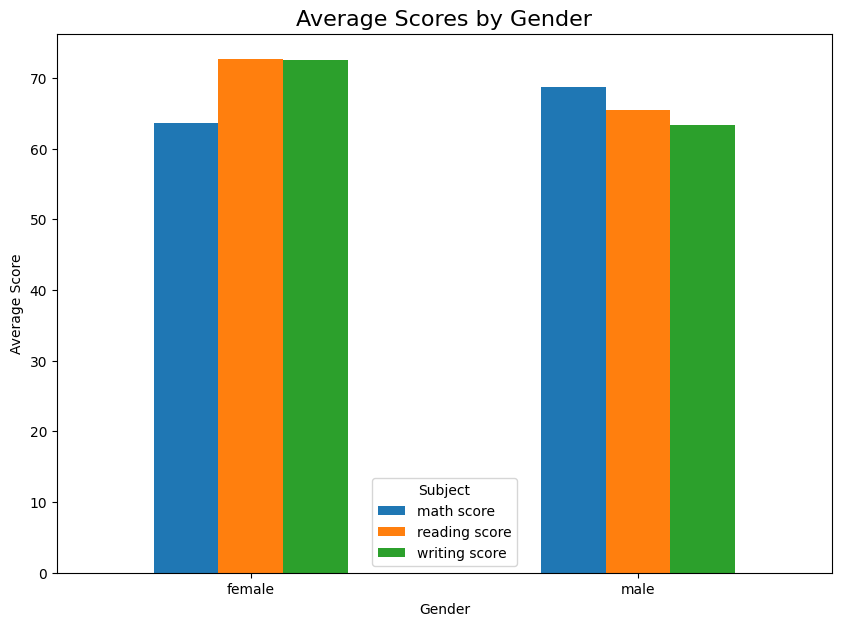

In [59]:
# Based on gender

gender_group.plot(kind='bar', figsize=(10, 7))

# Adding titles and labels for clarity
plt.title('Average Scores by Gender', fontsize=16)
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Subject')
plt.show()


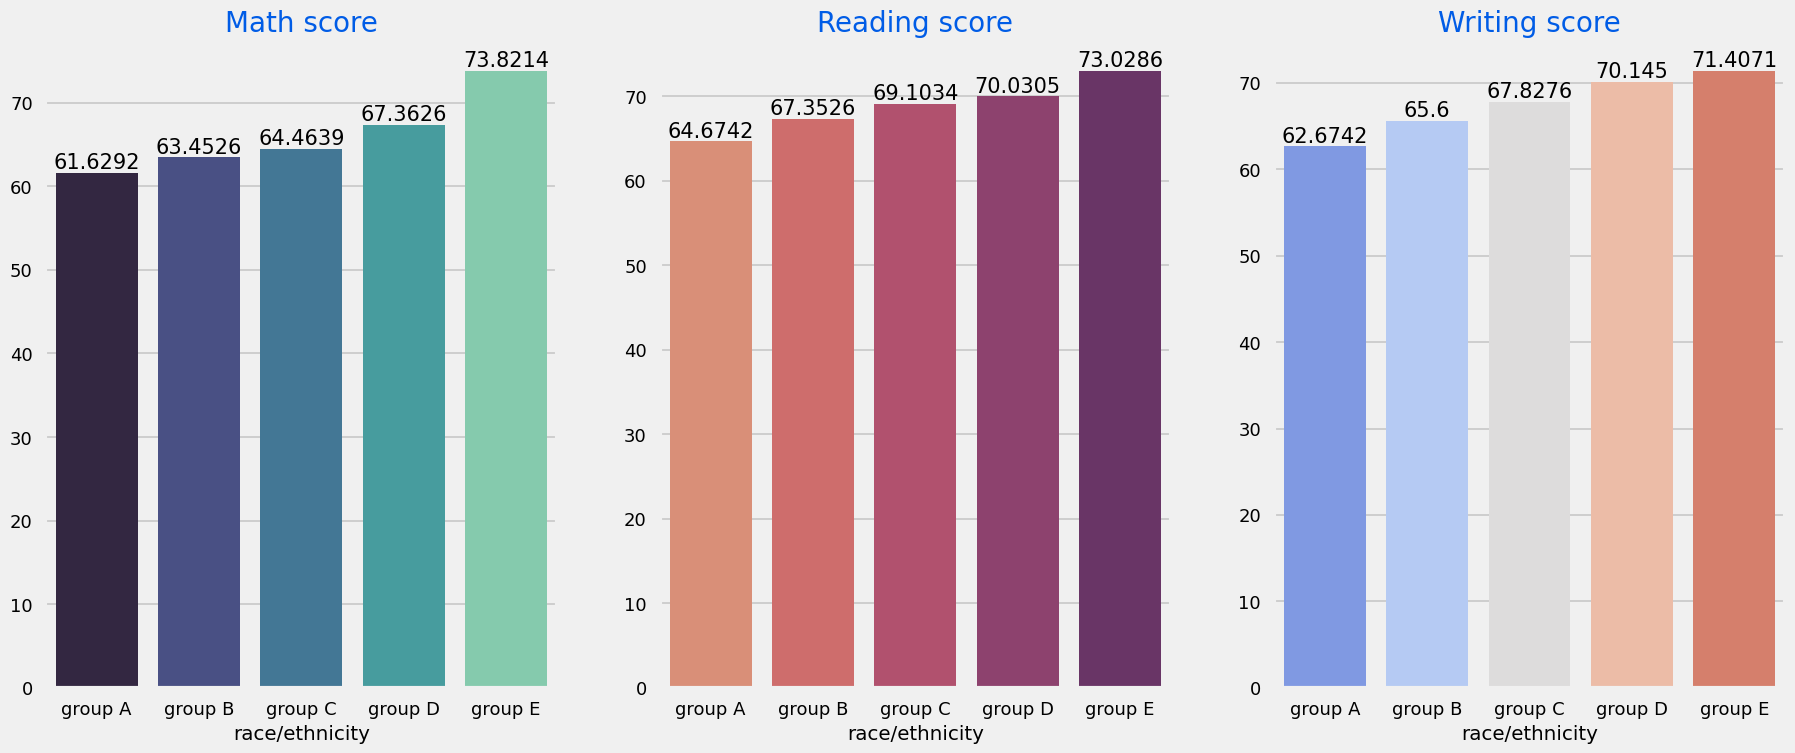

In [63]:
# Based on race/ethnicity and scores in each subjects

Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

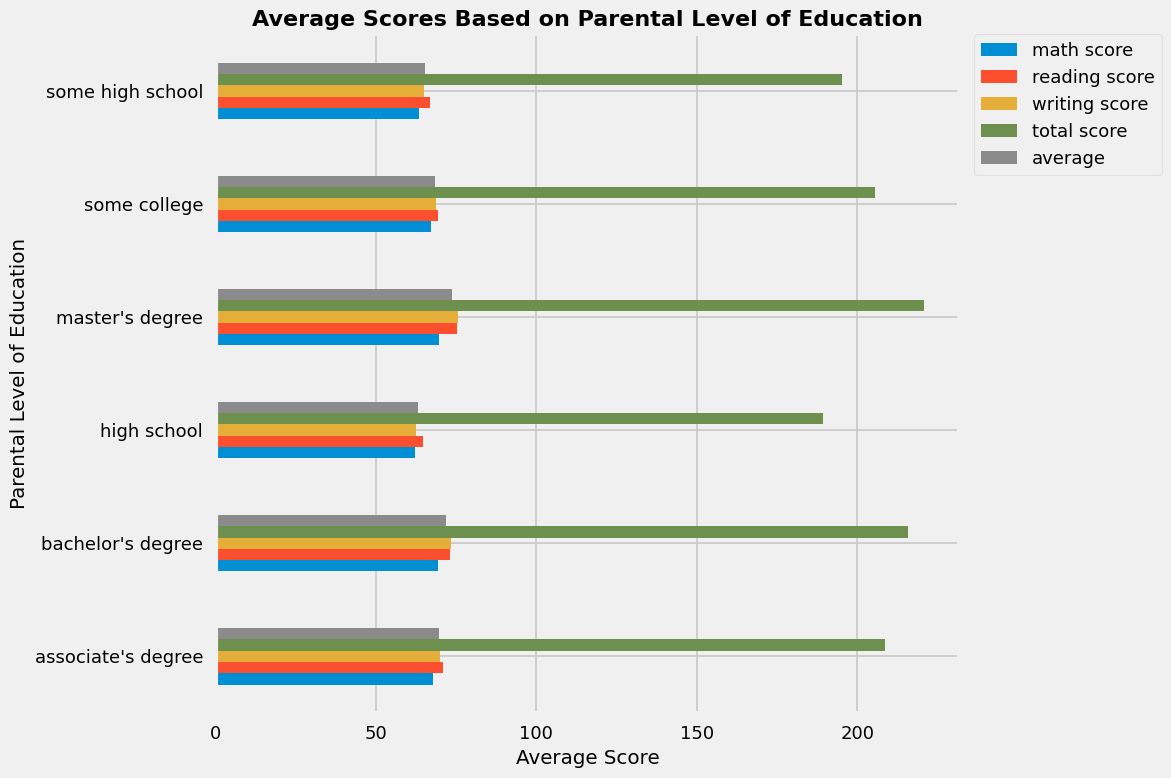

In [65]:
# Based on parental level of education and average scores

education_means = df.groupby('parental level of education').agg('mean', numeric_only=True)

education_means.plot(kind='barh', figsize=(12, 8))

plt.title('Average Scores Based on Parental Level of Education', fontsize=16, fontweight='bold')
plt.xlabel('Average Score')
plt.ylabel('Parental Level of Education')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()


Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

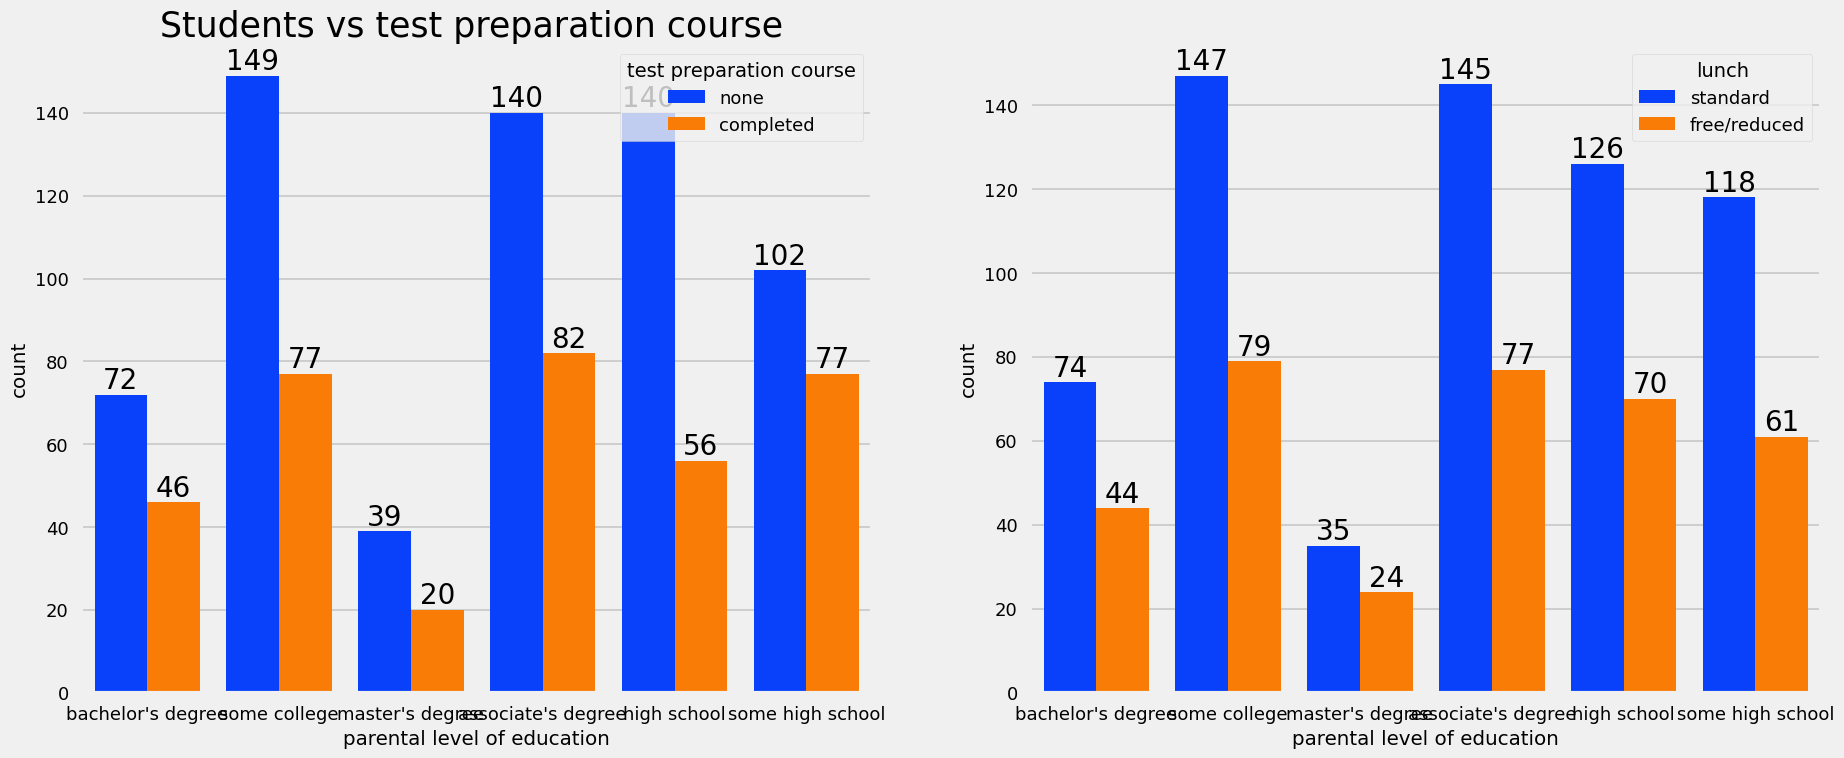

In [66]:
# Based on parental level of education and lunch

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

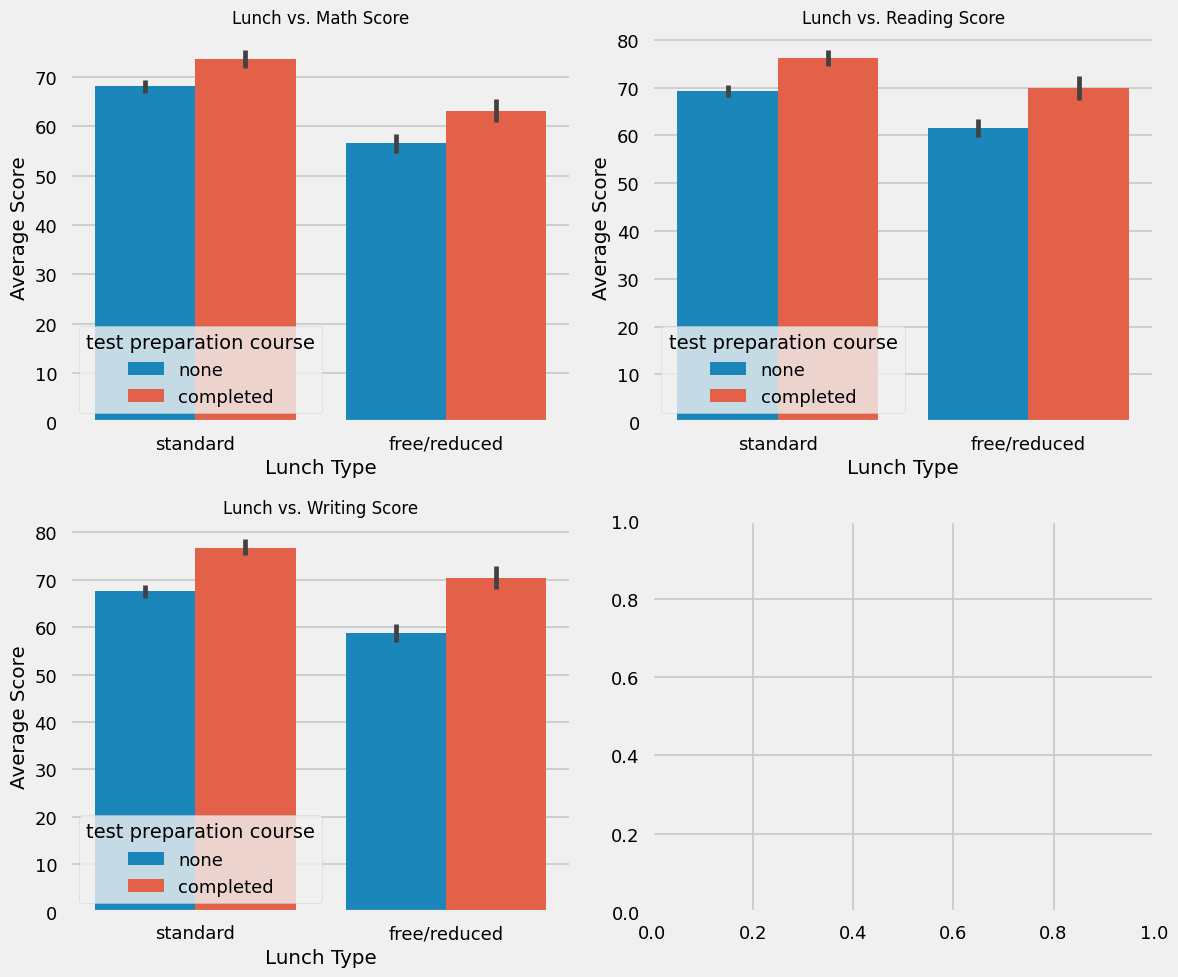

In [71]:
# Based on lunch and test preparation course

scores = ['math score', 'reading score', 'writing score']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, score in enumerate(scores):
    ax = axes[i] # Select the current subplot
    sns.barplot(x=df['lunch'], y=df[score], hue=df['test preparation course'], ax=ax)
    ax.set_title(f'Lunch vs. {score.title()}', fontsize=12) # Add a descriptive title
    ax.set_xlabel('Lunch Type') # Set a clear x-axis label
    ax.set_ylabel('Average Score') # Set a clear y-axis label

plt.tight_layout()
plt.show()


Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### Others

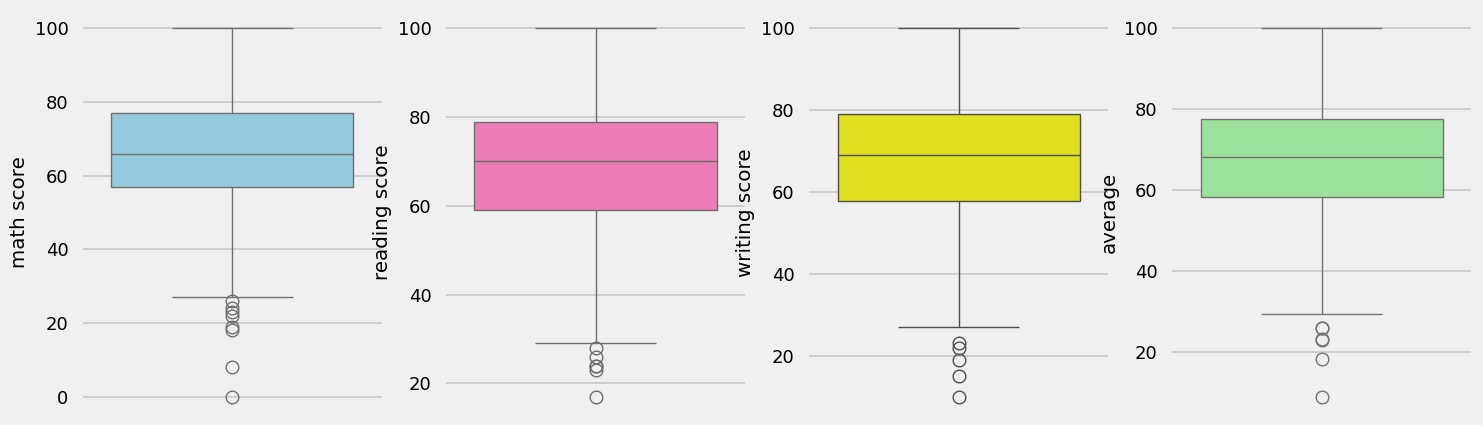

In [73]:
#check outliers using boxplot

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.